In [1]:
import os
import sys

import pandas as pd
import numpy as np
import math

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(1,4) # [,1,2]
    for i in pq_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,0,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, 0, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: %6.5f | order: %s'%(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [3]:
df = pd.read_csv("AlphaMergedV2.csv")  

df2 = df[df['name'] == 'JPM']
close = df2.close
time = df2.timestamp
df2 = pd.concat([close, time], axis = 1)

df2.set_index('timestamp', inplace = True)
close = df2.iloc[::-1]
close.head()

,close
timestamp,
1998-01-23,103.25
1998-01-26,102.13
1998-01-27,105.25
1998-01-28,106.00
1998-01-29,106.81


In [4]:
# log returns
lrets = np.log(close['close']/close['close'].shift(1)).fillna(0)
lrets.head()

timestamp
1998-01-23    0.000000
1998-01-26   -0.010907
1998-01-27    0.030092
1998-01-28    0.007101
1998-01-29    0.007612
Name: close, dtype: float64

In [5]:
print(lrets[5268:5270])  # 2019 Jan starts from index 5269, ends at index 5289, step 21

print(lrets[5290:5292])   # 2019 Feb starts from index 5290, ends at index 5308, step 19

print(lrets[5309:5311])   # 2019 Mar starts from index 5309, ends at index 5329, step 21
print(lrets[5329:5331])  

timestamp
2018-12-31    0.008126
2019-01-02    0.017164
Name: close, dtype: float64
timestamp
2019-02-01    0.003665
2019-02-04    0.003555
Name: close, dtype: float64
timestamp
2019-03-01    0.000671
2019-03-04   -0.002301
Name: close, dtype: float64
timestamp
2019-03-29    0.005150
2019-04-01    0.033131
Name: close, dtype: float64


In [6]:
JanS = 5269
JanE = 5289

FebS = 5290
FebE = 5308

MarS = 5309
MarE = 5329

# Jan

In [7]:
# predict for 2019 Jan
TS1 = lrets[1:JanS]    # change index

res_tup = _get_best_model(TS1)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=21, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -23007.86696 | order: (1, 0, 1)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20,h.21
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,0.000255,0.000255,0.000255,0.000255,0.000255,0.000255,0.000255,0.000255,0.000255,0.000255,...,0.000255,0.000255,0.000255,0.000255,0.000255,0.000255,0.000255,0.000255,0.000255,0.000255


In [8]:
preJan = 0*lrets[JanS:JanE+1]
for d in range(len(preJan)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preJan.iloc[d] = out.mean[colname].iloc[-1]

In [9]:
retsJan = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
retsJan['Real value'] = lrets[JanS:JanE+1]
retsJan['Prediction'] = preJan 

Jan = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
Jan['Real value']=retsJan['Real value'].cumsum()
Jan['Prediction'] = retsJan['Prediction'].cumsum()

JanReverse = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
JanReverse['Real value'] = Jan['Real value'] + np.log(close[JanS - 1:JanS])['close'].iloc[0] # add log of real value of 2018/12/31
JanReverse['Prediction'] = Jan['Prediction'] + np.log(close[JanS - 1:JanS])['close'].iloc[0]

for d in range(len(preJan)):
    JanReverse['Real value'].iloc[d] = math.exp( JanReverse['Real value'].iloc[d] )  # reverse log
    JanReverse['Prediction'].iloc[d] = math.exp( JanReverse['Prediction'].iloc[d] )
    
JanReverse

,Real value,Prediction
timestamp,,
2019-01-02,99.31,97.644929
2019-01-03,97.11,97.669864
2019-01-04,100.69,97.694806
2019-01-07,100.76,97.719754
2019-01-08,100.57,97.744709
2019-01-09,100.40,97.769669
2019-01-10,100.39,97.794637
2019-01-11,99.91,97.819610
2019-01-14,100.94,97.844590


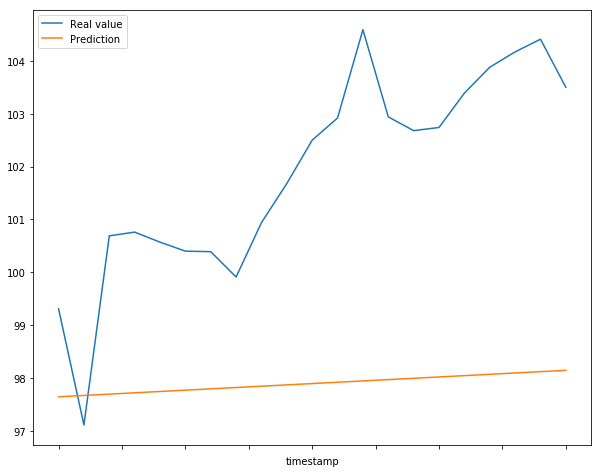

In [10]:
JanReverse['Real value'].plot(figsize=(10,8))
JanReverse['Prediction'].plot()
plt.legend()
plt.show()

# Feb

In [11]:
# predict for 2019 Feb
TS2 = lrets[1:FebS]    # change index

res_tup = _get_best_model(TS2)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=19, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -23116.56437 | order: (1, 0, 1)


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19
timestamp,,,,,,,,,,,,,,,,,,,
2019-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545,-0.001545


In [12]:
preFeb = 0*lrets[FebS:FebE+1]
for d in range(len(preFeb)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preFeb.iloc[d] = out.mean[colname].iloc[-1]

In [13]:
retsFeb = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
retsFeb['Real value'] = lrets[FebS:FebE+1]
retsFeb['Prediction'] = preFeb

Feb = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
Feb['Real value']=retsFeb['Real value'].cumsum()
Feb['Prediction'] = retsFeb['Prediction'].cumsum()

FebReverse = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
FebReverse['Real value'] = Feb['Real value'] + np.log(close[FebS-1:FebS])['close'].iloc[0] # add log of real value at 2018/12/31
FebReverse['Prediction'] = Feb['Prediction'] + np.log(close[FebS-1:FebS])['close'].iloc[0]

for d in range(len(preFeb)):
    FebReverse['Real value'].iloc[d] = math.exp( FebReverse['Real value'].iloc[d] )  # reverse log
    FebReverse['Prediction'].iloc[d] = math.exp( FebReverse['Prediction'].iloc[d] )
    
FebReverse

,Real value,Prediction
timestamp,,
2019-02-01,103.88,103.340205
2019-02-04,104.25,103.180657
2019-02-05,103.79,103.021355
2019-02-06,103.74,102.862299
2019-02-07,102.38,102.703489
2019-02-08,101.36,102.544923
2019-02-11,100.88,102.386603
2019-02-12,102.60,102.228527
2019-02-13,103.09,102.070695


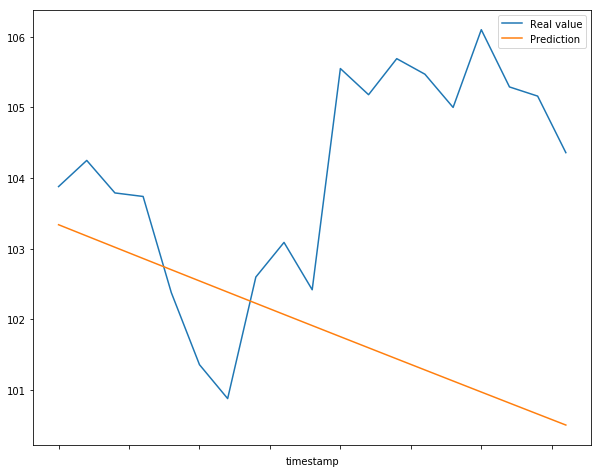

In [14]:
FebReverse['Real value'].plot(figsize=(10,8))
FebReverse['Prediction'].plot()
plt.legend()
plt.show()

# Mar

In [15]:
# predict for 2019 Mar
TS3 = lrets[1:MarS]    # change index

res_tup = _get_best_model(TS3)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=21, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -23216.14093 | order: (1, 0, 1)


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: over

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20,h.21
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,...,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319


In [16]:
preMar = 0*lrets[MarS:MarE+1]
for d in range(len(preMar)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preMar.iloc[d] = out.mean[colname].iloc[-1]

In [17]:
retsMar = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
retsMar['Real value'] = lrets[MarS:MarE+1]
retsMar['Prediction'] = preMar 

Mar = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
Mar['Real value']=retsMar['Real value'].cumsum()
Mar['Prediction'] = retsMar['Prediction'].cumsum()

MarReverse = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
MarReverse['Real value'] = Mar['Real value'] + np.log(close[MarS-1:MarS])['close'].iloc[0] # add log of real value at 2018/12/31
MarReverse['Prediction'] = Mar['Prediction'] + np.log(close[MarS-1:MarS])['close'].iloc[0]

for d in range(len(preMar)):
    MarReverse['Real value'].iloc[d] = math.exp( MarReverse['Real value'].iloc[d] )  # reverse log
    MarReverse['Prediction'].iloc[d] = math.exp( MarReverse['Prediction'].iloc[d] )
    
MarReverse

,Real value,Prediction
timestamp,,
2019-03-01,104.43,104.393272
2019-03-04,104.19,104.426554
2019-03-05,104.11,104.459847
2019-03-06,103.72,104.493151
2019-03-07,102.97,104.526466
2019-03-08,103.01,104.559791
2019-03-11,104.35,104.593126
2019-03-12,104.04,104.626472
2019-03-13,104.39,104.659829


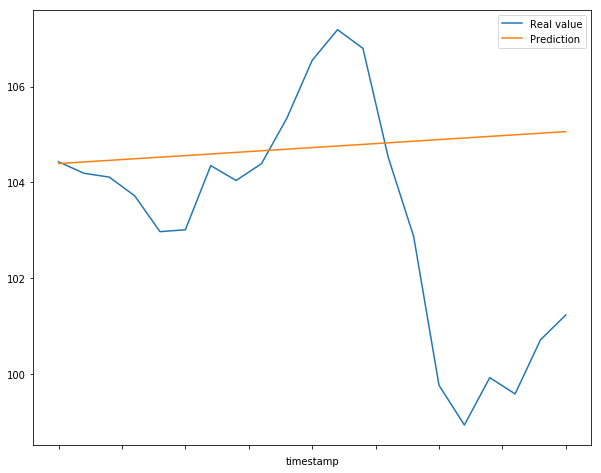

In [18]:
MarReverse['Real value'].plot(figsize=(10,8))
MarReverse['Prediction'].plot()
plt.legend()
plt.show()

# Combine Dataframes of 3 months

In [19]:
JPM = pd.concat([JanReverse, FebReverse, MarReverse])
JPM.columns = ['JPM real value', 'JPM prediction']
JPM.to_csv('JPM_pred.csv')